In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [113]:
#Reading Train Data
train = pd.read_csv("train.csv")
Embarked = train["Embarked"].value_counts()
train["Embarked"] = Embarked.astype(float)
Cabin = train["Cabin"].value_counts()
train["Cabin"] = Cabin.astype(float)
ticket= train["Ticket"].value_counts()
train["Ticket"] = Cabin.astype(float)
train["Sex"][train["Sex"]=='male']=0
train["Sex"][train["Sex"]=='female']=1
train["Survived"].head()

C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

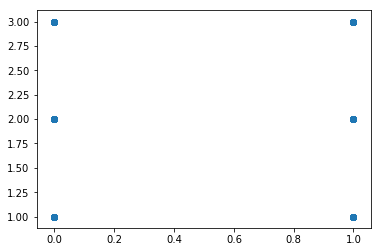

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(train.Survived,train.Pclass)
plt.show()

C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


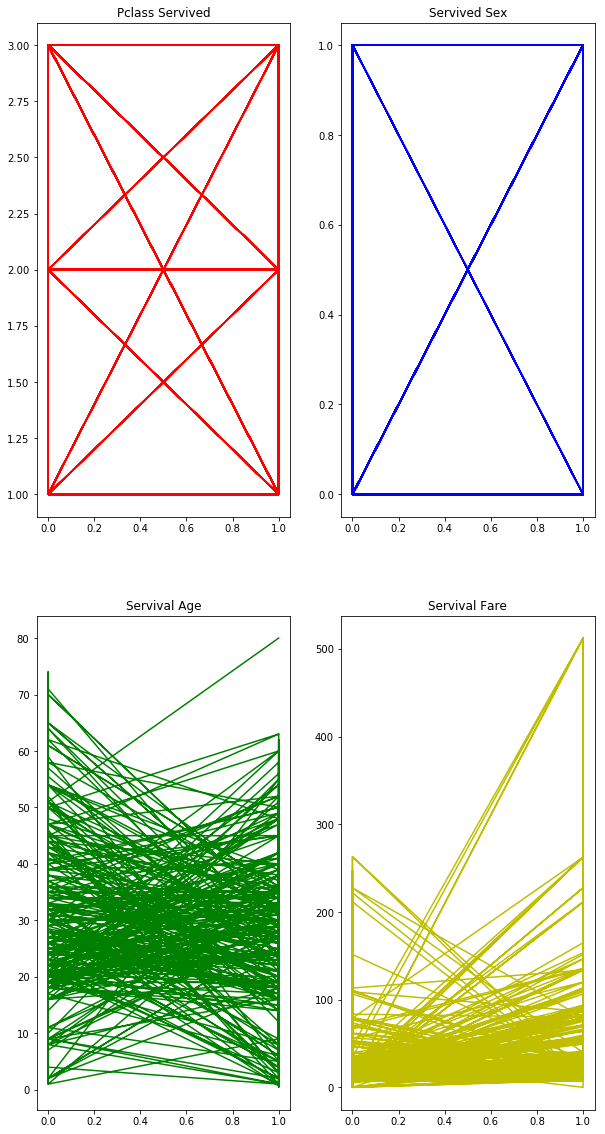

In [17]:
plt.figure(figsize=(10,20))
plt.subplots_adjust(hspace= 0.2, wspace= 0.2)
plt.subplot(2,2,1)
plt.title ('Pclass Servived')
plt.plot(train.Survived,train.Pclass,'r')
plt.subplot(2,2,2)
plt.title ('Servived Sex')
train["Sex"][train["Sex"]=='male'] =0
train["Sex"][train["Sex"]=='female'] =1
plt.plot(train.Survived,train.Sex, 'b')
plt.subplot(2,2,3)
plt.title ('Servival Age')
plt.plot(train.Survived,train.Age, 'g')
plt.subplot(2,2,4)
plt.title ('Servival Fare')
plt.plot(train.Survived,train.Fare,'y')
plt.show()

In [79]:
X_train = train.drop(["Survived","Name"],axis=1)
X_train.fillna(0,inplace=True)
#X_train["Embarked"]=X_train["Embarked"].astype(float)
y_train = train["Survived"]
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,0,22.0,1,0,0.0,7.2500,0.0,0.0
1,2,1,1,38.0,1,0,0.0,71.2833,0.0,0.0
2,3,3,1,26.0,0,0,0.0,7.9250,0.0,0.0
3,4,1,1,35.0,1,0,0.0,53.1000,0.0,0.0
4,5,3,0,35.0,0,0,0.0,8.0500,0.0,0.0


In [24]:
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score


In [25]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    
    
    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params , scoring=scoring_fnc , cv=cv_sets )

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [127]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print(reg.score())


Parameter 'max_depth' is 3 for the optimal model.


TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [93]:
test=pd.read_csv("test.csv")
test=test.drop("Name",axis=1)
Embarked = test["Embarked"].value_counts()
test["Embarked"] = Embarked.astype(float)
Cabin = test["Cabin"].value_counts()
test["Cabin"] = Cabin.astype(float)
ticket= test["Ticket"].value_counts()
test["Ticket"] = Cabin.astype(float)
test["Sex"][test["Sex"]=='male']=0
test["Sex"][test["Sex"]=='female']=1
test.head()


C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,34.5,0,0,NaN,7.8292,NaN,NaN
1,893,3,1,47.0,1,0,NaN,7.0000,NaN,NaN
2,894,2,0,62.0,0,0,NaN,9.6875,NaN,NaN
3,895,3,0,27.0,0,0,NaN,8.6625,NaN,NaN
4,896,3,1,22.0,1,1,NaN,12.2875,NaN,NaN


In [118]:
%matplotlib inline
test.fillna(0,inplace=True)
#print(train["Survived"].head())
Survived = pd.Series(train["Survived"])
#print(Survived)
for i, Survived in enumerate(reg.predict(test)):
    print("Servial {}'s : ${:,.2f}".format(i+1, Survived))

Servial 1's : $0.10
Servial 2's : $0.59
Servial 3's : $0.10
Servial 4's : $0.10
Servial 5's : $0.59
Servial 6's : $0.10
Servial 7's : $0.59
Servial 8's : $0.46
Servial 9's : $0.59
Servial 10's : $0.10
Servial 11's : $0.10
Servial 12's : $0.10
Servial 13's : $0.98
Servial 14's : $0.10
Servial 15's : $0.98
Servial 16's : $0.90
Servial 17's : $0.10
Servial 18's : $0.10
Servial 19's : $0.59
Servial 20's : $0.59
Servial 21's : $0.46
Servial 22's : $0.43
Servial 23's : $0.98
Servial 24's : $0.46
Servial 25's : $0.98
Servial 26's : $0.10
Servial 27's : $0.98
Servial 28's : $0.10
Servial 29's : $0.46
Servial 30's : $0.10
Servial 31's : $0.10
Servial 32's : $0.46
Servial 33's : $0.59
Servial 34's : $0.11
Servial 35's : $0.46
Servial 36's : $0.10
Servial 37's : $0.59
Servial 38's : $0.59
Servial 39's : $0.10
Servial 40's : $0.46
Servial 41's : $0.43
Servial 42's : $0.46
Servial 43's : $0.10
Servial 44's : $0.90
Servial 45's : $0.98
Servial 46's : $0.10
Servial 47's : $0.46
Servial 48's : $0.10
S

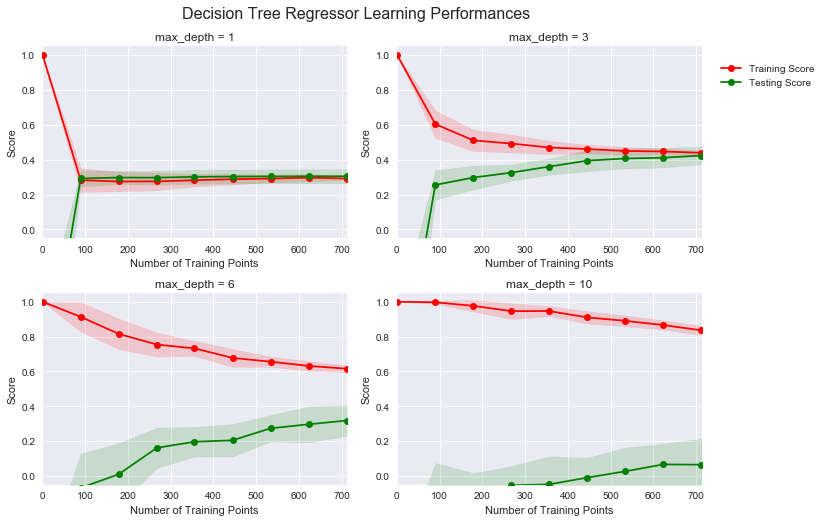

In [100]:
import visuals as vs
vs.ModelLearning(X_train, y_train)

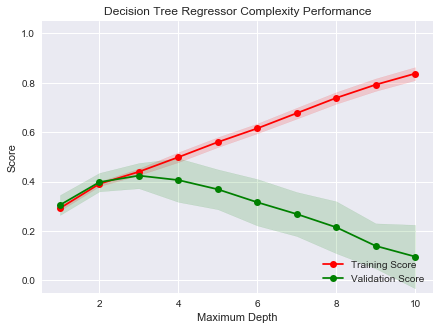

In [97]:
vs.ModelComplexity(X_train, y_train)

In [99]:
vs.PredictTrials(X_train, y_train, fit_model,test)

KeyError: 0